In [3]:
import time
class TreeNode:
    def __init__(self, val, freq, left, right):
        self.val=val
        self.freq=freq
        self.left=left
        self.right=right
        self.cost = None
        pass
    def __str__(self):
        if self.left is None and self.right is None:
            return str(self.val)
        left = str(self.left) if self.left is not None else '()'
        right = str(self.right) if self.right is not None else '()'
        return '({} {} {})'.format(self.val,left,right)
        
    def computeCost(self):
        if self.cost is not None:
            return self.cost
        def helper(n,depth):
            if n is None:
                return 0
            return depth * n.freq + helper(n.left, depth+1) + helper(n.right, depth +1)
        self.cost = helper(self, 1)
        return self.cost
    pass
pass

In [4]:
def buildOptimalTree(keys, start, end):
    if start > end:
        return None

    min_cost = float('inf')
    root = None

    for i in range(start, end + 1):
        left_subtree = buildOptimalTree(keys, start, i - 1)
        right_subtree = buildOptimalTree(keys, i + 1, end)
        cost = sum(key[1] for key in keys[start:end + 1])
        if left_subtree:
            cost += left_subtree.computeCost()
        if right_subtree:
            cost += right_subtree.computeCost()
        if cost < min_cost:
            min_cost = cost
            root = TreeNode(keys[i][0], keys[i][1], left_subtree, right_subtree)

    return root

# In the main function, call buildOptimalTree with appropriate arguments:
root = buildOptimalTree(keys, 0, len(keys) - 1)


NameError: name 'keys' is not defined

In [5]:
def buildOptimalTree(keys, start, end):
    if start > end:
        return None

    min_cost = float('inf')
    root = None

    for i in range(start, end + 1):
        left_subtree = buildOptimalTree(keys, start, i - 1)
        right_subtree = buildOptimalTree(keys, i + 1, end)
        cost = sum(key[1] for key in keys[start:end + 1])
        if left_subtree:
            cost += left_subtree.computeCost()
        if right_subtree:
            cost += right_subtree.computeCost()
        if cost < min_cost:
            min_cost = cost
            root = TreeNode(keys[i][0], keys[i][1], left_subtree, right_subtree)

    return root


In [6]:
keys = [
    (0, 3),
    (1, 5),
    (2, 20),
    (3, 1),
    (4, 3),
    (5, 5),
    (6, 3),
    (7, 1),
    (8, 2),
    (9, 3),
    (10, 25),
    (11, 1),
    (12, 5),
    (13, 3),
    (14, 20)
]



In [7]:
root = buildOptimalTree(keys, 0, len(keys) - 1)
print(root)

(10 (2 (1 0 ()) (5 (4 3 ()) (8 (6 () 7) 9))) (14 (12 11 13) ()))


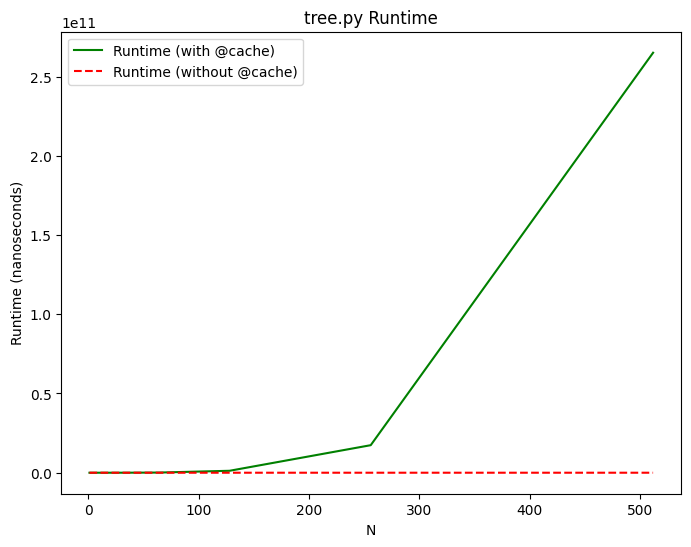

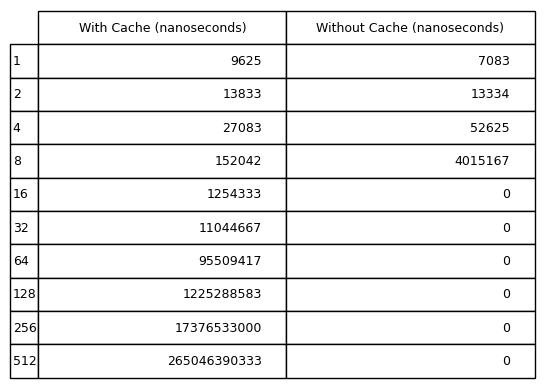

In [9]:
import sys
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
from functools import cache
sys.setrecursionlimit(50000)

class TreeNode:
    def __init__(self, val, freq, left, right):
        self.val=val
        self.freq=freq
        self.left=left
        self.right=right
        self.cost = None
        pass
    def __str__(self):
        if self.left is None and self.right is None:
            return str(self.val)
        left = str(self.left) if self.left is not None else '()'
        right = str(self.right) if self.right is not None else '()'
        return '({} {} {})'.format(self.val,left,right)
        
    def computeCost(self):
        if self.cost is not None:
            return self.cost
        def helper(n,depth):
            if n is None:
                return 0
            return depth * n.freq + helper(n.left, depth+1) + helper(n.right, depth +1)
        self.cost = helper(self, 1)
        return self.cost
    pass
pass


# Your code here.
def readTree(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    data = [tuple(map(int, line.strip().split(':'))) for line in lines]
    return tuple(data)

@cache
def findTree(keys, head, tail):
    if head > tail:
        return None

    min_cost = sys.maxsize
    branch = None

    for i in range(head, tail + 1):
        left_subtree = findTree(keys, head, i - 1)
        right_subtree = findTree(keys, i + 1, tail)
        cost = sum(key[1] for key in keys[head:tail + 1])
        if left_subtree:
            cost += left_subtree.computeCost()
        if right_subtree:
            cost += right_subtree.computeCost()
        if cost < min_cost:
            min_cost = cost
            branch = TreeNode(keys[i][0], keys[i][1], left_subtree, right_subtree)

    return branch


def findTreeNoCache(keys, head, tail):
    if head > tail:
        return None

    min_cost = sys.maxsize
    branch = None

    for i in range(head, tail + 1):
        left_subtree = findTreeNoCache(keys, head, i - 1)
        right_subtree = findTreeNoCache(keys, i + 1, tail)
        cost = sum(key[1] for key in keys[head:tail + 1])
        if left_subtree:
            cost += left_subtree.computeCost()
        if right_subtree:
            cost += right_subtree.computeCost()
        if cost < min_cost:
            min_cost = cost
            branch = TreeNode(keys[i][0], keys[i][1], left_subtree, right_subtree)
    return branch

def getN(x, y):
    tmp = x
    ans = [tmp]
    
    while tmp < y:
        tmp = tmp * 2
        ans.append(tmp)
    
    return ans

def getTree(n):
    tree = []
    for i in range(n):
        tree.append((random.randint(1, 200), random.randint(1, 200)))
    return tuple(tree)

# get the runtime array with cache
def getTime(arrN):
    timeS = []
    for i in range(len(arrN)):
        tree = getTree(arrN[i])
        timeBeforeS = time.perf_counter_ns()
        findTree(tree, 0, len(tree) - 1)
        timeS.append(time.perf_counter_ns() - timeBeforeS)
    return timeS

def getTimeNCache(arrN):
    timeS = []
    for i in range(len(arrN)):
        tree = getTree(arrN[i])
        timeBeforeS = time.perf_counter_ns()
        findTreeNoCache(tree, 0, len(tree) - 1)
        timeS.append(time.perf_counter_ns() - timeBeforeS)
    return timeS 

def getExpResult():
    arrN = getN(1, 512)
    nocache = []
    for i in arrN:
        nocache.append(0)
    noN = [1, 2, 4, 8]
    nocache = getTimeNCache(noN)
    for i in range(len(arrN) - 4):
        nocache.append(0)
        
    time = getTime(arrN)
    
    # save plot
    plt.figure(figsize=(8, 6))

    plt.plot(arrN, time, label='Runtime (with @cache)', color='green')
    plt.plot(arrN, nocache, label='Runtime (without @cache)', color='red', linestyle="dashed")
    plt.xlabel('N')
    plt.ylabel('Runtime (nanoseconds)')
    plt.title('tree.py Runtime')
    plt.legend()

    plt.savefig('q3.png')

    fig, ax =plt.subplots(1, 1)

    table = pd.DataFrame()
    table['With Cache (nanoseconds)'] = time
    table['Without Cache (nanoseconds)'] = nocache
    ax.axis('tight')
    ax.axis('off')

    #plotting data
    table = ax.table(cellText = table.values,
            colLabels = table.columns,
            rowLabels = arrN,
            loc="center")
    table.set_fontsize(14)
    table.scale(1,2)
    plt.savefig('q3_table.png')
    return 0

def main():
    # filename = sys.argv[1]
    # tree = readTree(filename)
    # timeB = time.perf_counter_ns()
    # branch = findTree(tree, 0, len(tree) - 1)
    # timeA = time.perf_counter_ns() - timeB
    # print(branch)
    # print(branch.computeCost())
    # print(timeA)
    getExpResult()
    

if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Input arguments number is wrong!")
        sys.exit(1)
    main()